In [1]:
%matplotlib notebook

import numpy as np
import toolz
import matplotlib.pyplot as plt

## Frequency response

Implicitly plot the function

\begin{align}
\frac{\gamma^2}{z^2} &= (\omega^2 - \alpha - \frac{3}{4}\beta z^2)^2 + (\delta \omega)^2 \implies \\
\frac{z}{\gamma} &= \frac{1}{\sqrt{(\omega^2 - \alpha - \frac{3}{4}\beta z^2)^2 + (\delta \omega)^2}} \implies \\
F &= G
\end{align}


In [2]:
def left(gamma, z):
    return z / gamma

def right(alpha, beta, delta, z, omega):
    denom = (omega**2 - alpha - (3/4)*beta*z**2)**2 + (delta*omega)**2
    return 1/np.sqrt(denom)

<IPython.core.display.Javascript object>


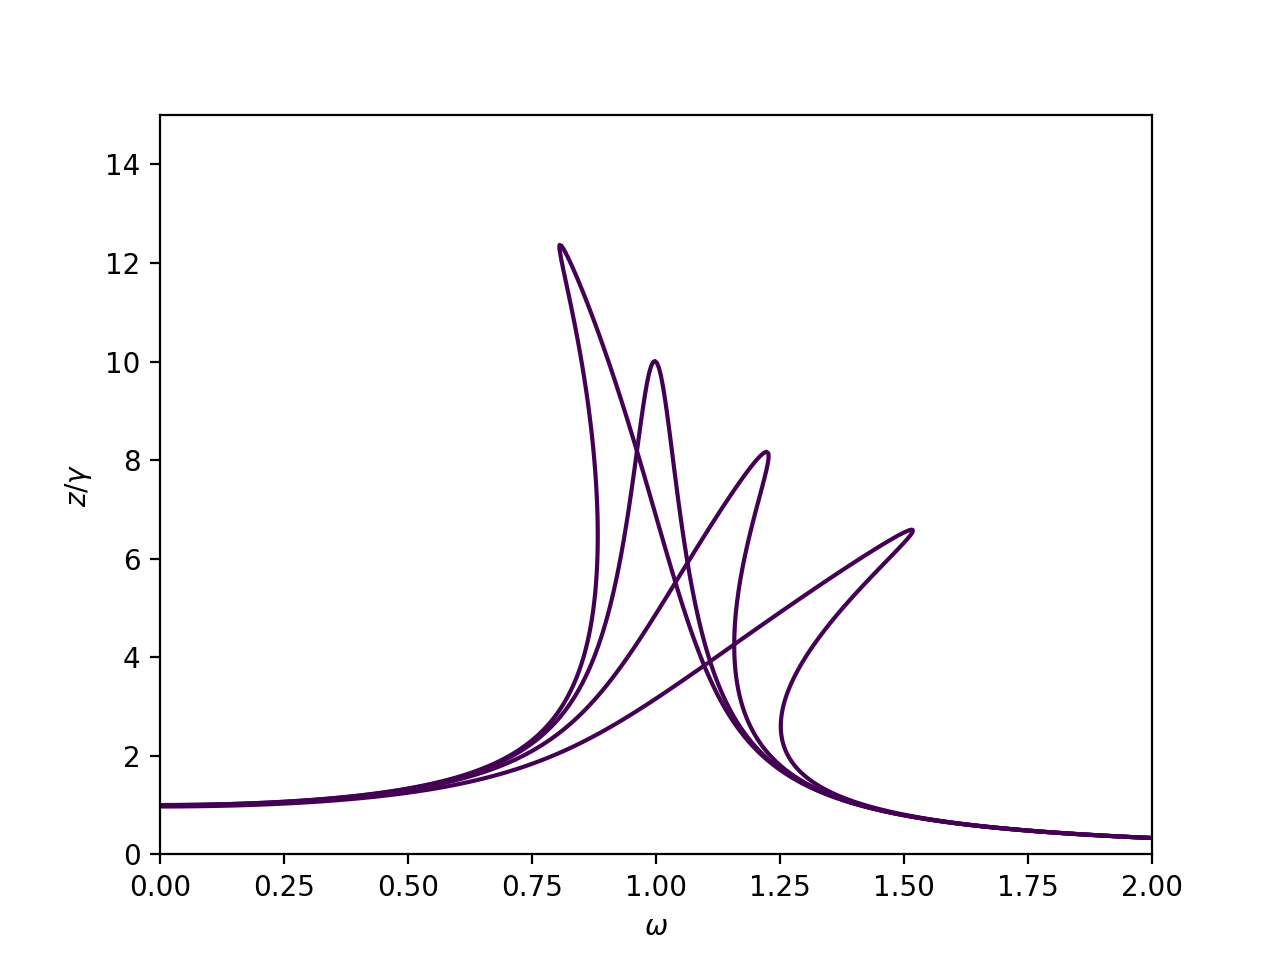

In [3]:
gamma = 1
alpha = 1
beta_mul = 0.01
delta = 0.1

z, omega = np.meshgrid(
    np.linspace(0, 15, 500),
    np.linspace(0, 2, 500)
)

plt.figure()
for beta in (-0.3, 0.0, 1, 4):
    F = left(gamma, z)
    G = right(alpha, beta*beta_mul, delta, z, omega)
    plt.contour(omega, z, (F-G), [0])
    plt.xlabel("$\omega$")
    plt.ylabel("$z/\gamma$")

<IPython.core.display.Javascript object>


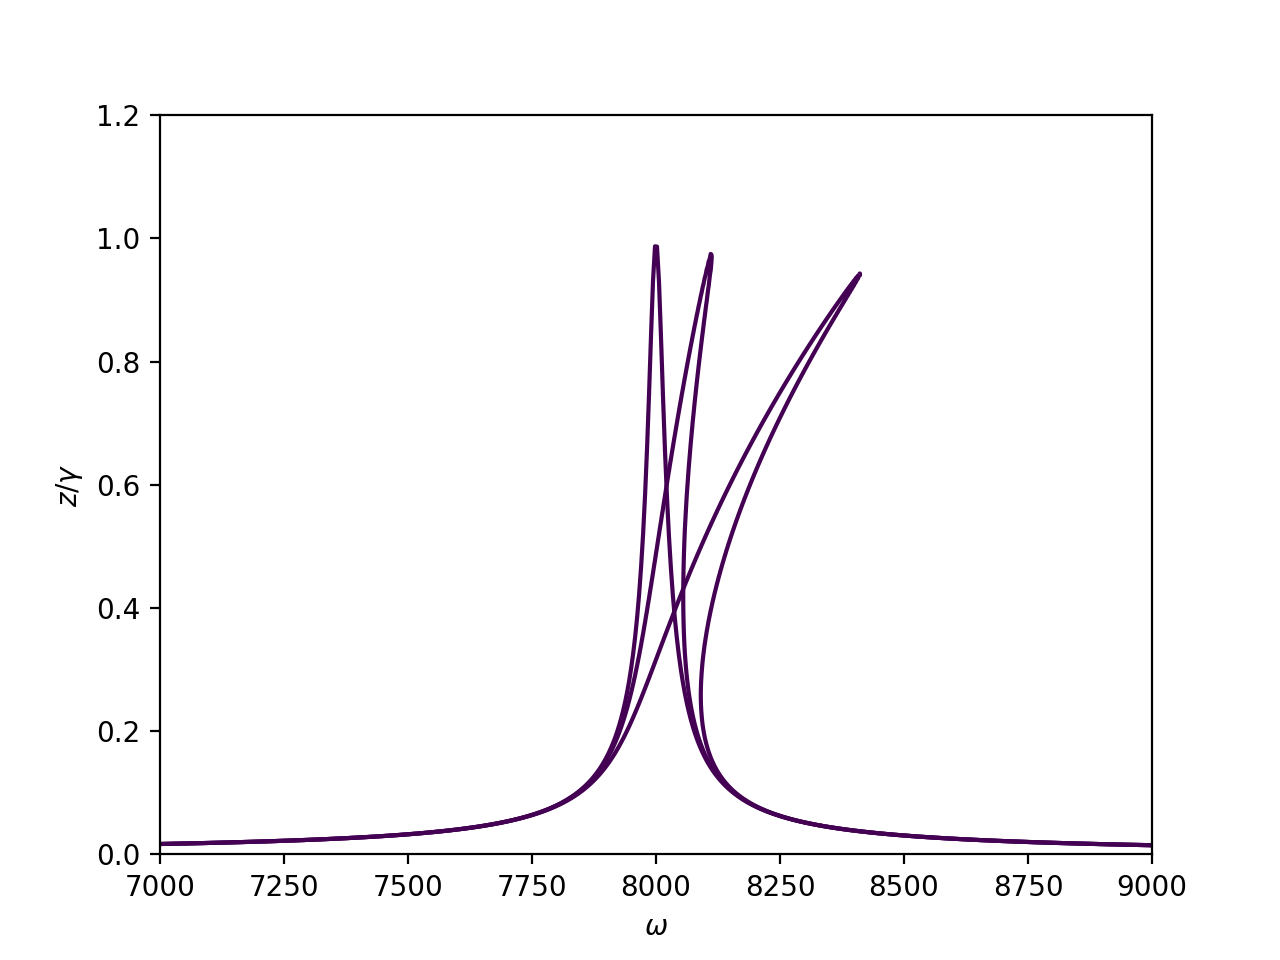

In [7]:
def left(gamma, z):
    return z / gamma

def right(alpha, beta, delta, z, f):
    omega = 2*np.pi*f
    denom = (omega**2 - alpha - (3/4)*beta*z**2)**2 + (delta*omega)**2
    return 1/np.sqrt(denom)

f_resonance = 8e3
omega_resonance = 2*np.pi*f_resonance

gamma = 1e7
alpha = omega_resonance**2
beta_mul = 1e8
delta = 200

z, fs = np.meshgrid(
    np.linspace(0, 1.2, 500),
    np.linspace(7e3, 9e3, 500)
)

plt.figure()
for beta in (0.0, 1, 4):
    F = left(gamma, z)
    G = right(alpha, beta*beta_mul, delta, z, fs)
    plt.contour(fs, z, (F-G), [0])
    plt.xlabel("$\omega$")
    plt.ylabel("$z/\gamma$")

## Rough method

#### Simulating frequency response -- no coupling

 1. Calculate linear stiffness $\alpha$ from resonance frequencies.
 2. Derive slope and half-width maximum by search on $\beta$ and $\delta$. Scale signals and apply MSE loss function.
 3. Finally, scale amplitude by the inverse of scaling factor in 2).
 
Step 3) outputs ballpark parameters for frequency scan simulations. See other notebook for coupling and further optimization.